In [95]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = 10, 5
from statsmodels.tsa.seasonal import seasonal_decompose

In [96]:
#It is recommended that we make our time series reference as the index
df1 = pd.read_csv('AirPassenger.csv', parse_dates = ['Year-Month'], index_col = 'Year-Month')

FileNotFoundError: [Errno 2] No such file or directory: 'AirPassenger.csv'

In [ ]:
df1.head()

In [ ]:
#Plot the time series
df1.plot()
plt.show()

We see an increasing trend and seasonality which is not constant in nature.

# Decomposition

In [ ]:
#Decompose the time series additively
df1_add_decompose = seasonal_decompose(df1, model = 'additive')

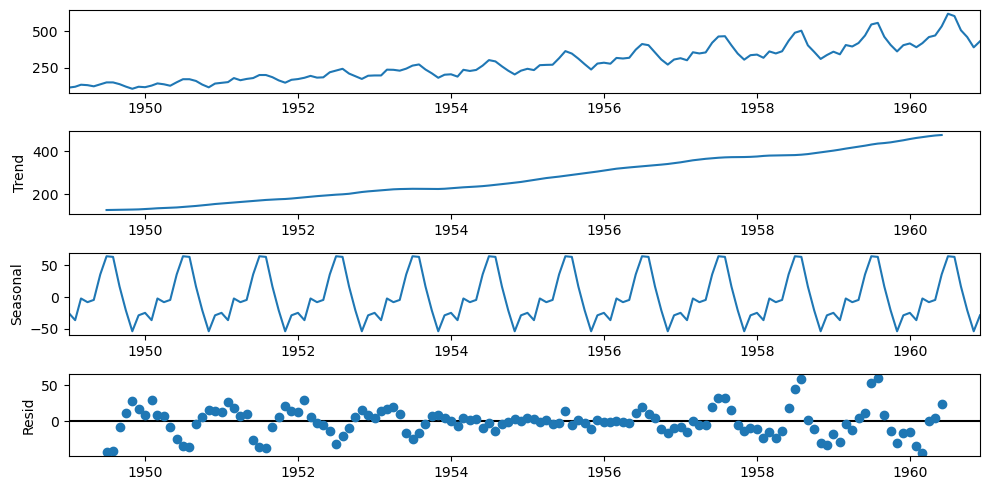

In [97]:
df1_add_decompose.plot()
plt.show()

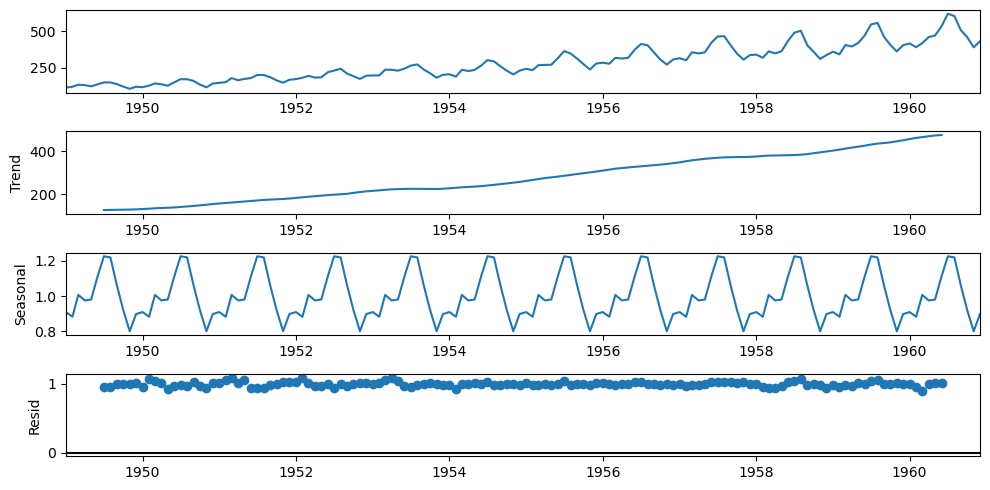

In [98]:
##Decompose the time series multiplicatively
df1_mul_decompose = seasonal_decompose(df1, model = "multiplicative")
df1_mul_decompose.plot()
plt.show()

* Check the basic measures of descriptive statistics of the Time Series

In [99]:
round(df1.describe())

,Pax
count,144.0
mean,280.0
std,120.0
min,104.0
25%,180.0
50%,266.0
75%,360.0
max,622.0


#  Split Data In  Train Test

In [100]:
train    =   df1[0:int(len(df1)*0.7)] 
test     =   df1[int(len(df1)*0.7):]

In [101]:
print(train.shape)
print(test.shape)

(100, 1)
(44, 1)


In [102]:
df1

,Pax
Year-Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


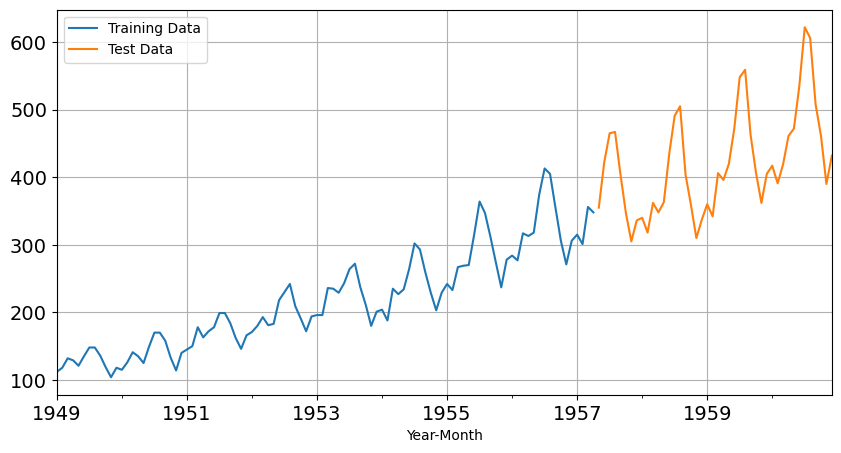

In [103]:
train['Pax'].plot(fontsize=14)
test['Pax'].plot(fontsize=14)
plt.grid()
plt.legend(['Training Data','Test Data'])
plt.show()

# Building different models and comparing the accuracy metrics

#  Model 1: Linear Regression

In [13]:
train_time = [i+1 for i in range(len(train))]
test_time = [i+101 for i in range(len(test))]
print('Training Time instance','\n',train_time)
print('Test Time instance','\n',test_time)

Training Time instance 
 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100]
Test Time instance 
 [101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144]


In [14]:
LinearRegression_train = train.copy()
LinearRegression_test = test.copy()

In [15]:
LinearRegression_train['time'] = train_time
LinearRegression_test['time'] = test_time

In [16]:
import statsmodels.api as sm

In [17]:
model=sm.OLS(LinearRegression_train.Pax,LinearRegression_train.time).fit()

In [18]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                    Pax   R-squared (uncentered):                   0.936
Model:                            OLS   Adj. R-squared (uncentered):              0.935
Method:                 Least Squares   F-statistic:                              1449.
Date:                Thu, 02 Mar 2023   Prob (F-statistic):                    6.44e-61
Time:                        13:51:54   Log-Likelihood:                         -548.45
No. Observations:                 100   AIC:                                      1099.
Df Residuals:                      99   BIC:                                      1101.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
time           3.8340      0.101     38.064      0.000       3.634       4.034
==============================================================================
Omnibus:                        8.630   Durbin-Watson:                   0.161
Prob(Omnibus):                  0.013   Jarque-Bera (JB):                3.622
Skew:                          -0.161   Prob(JB):                        0.163
Kurtosis:                       2.125   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

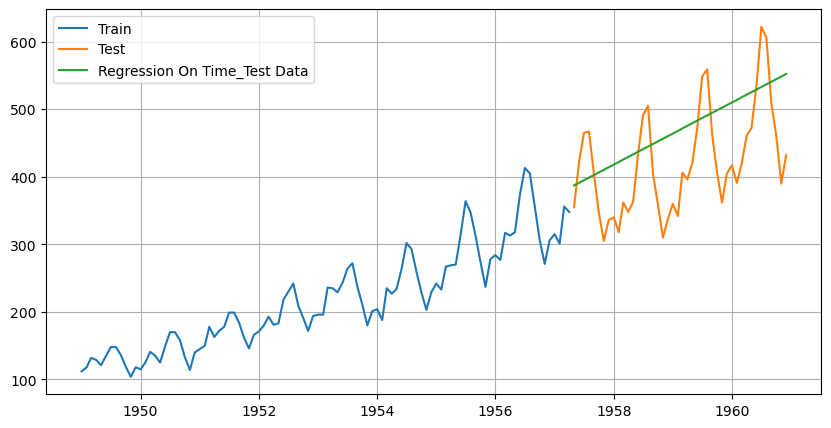

In [19]:
train_predictions_model1         = model.predict(LinearRegression_train[['time']])
LinearRegression_train['RegOnTime'] = train_predictions_model1

test_predictions_model1         = model.predict(LinearRegression_test[['time']])
LinearRegression_test['RegOnTime'] = test_predictions_model1

plt.plot( train['Pax'], label='Train')
plt.plot(test['Pax'], label='Test')
plt.plot(LinearRegression_test['RegOnTime'], label='Regression On Time_Test Data')

plt.legend(loc='best')
plt.grid();

In [20]:
LinearRegression_test['RegOnTime'].describe()

count     44.000000
mean     469.666484
std       49.248777
min      387.235224
25%      428.450854
50%      469.666484
75%      510.882115
max      552.097745
Name: RegOnTime, dtype: float64

In [21]:
from sklearn import metrics

In [22]:
rmse_model1_test = metrics.mean_squared_error(test['Pax'],test_predictions_model1,squared=False)
print("For RegressionOnTime forecast on the Test Data,  RMSE is %3.3f " %(rmse_model1_test))

For RegressionOnTime forecast on the Test Data,  RMSE is 83.497 


In [23]:
resultsDf = pd.DataFrame({'Test RMSE': [rmse_model1_test]},index=['RegressionOnTime'])
resultsDf

,Test RMSE
RegressionOnTime,83.497125


In [24]:
# Model 2: Naive Approach:  𝑦̂ 𝑡+1=𝑦 t

In [25]:
NaiveModel_train = train.copy()
NaiveModel_test = test.copy()

In [26]:
NaiveModel_test['naive'] = np.asarray(train['Pax'])[len(np.asarray(train['Pax']))-1]
NaiveModel_test['naive'].head()

Year-Month
1957-05-01    348
1957-06-01    348
1957-07-01    348
1957-08-01    348
1957-09-01    348
Name: naive, dtype: int64

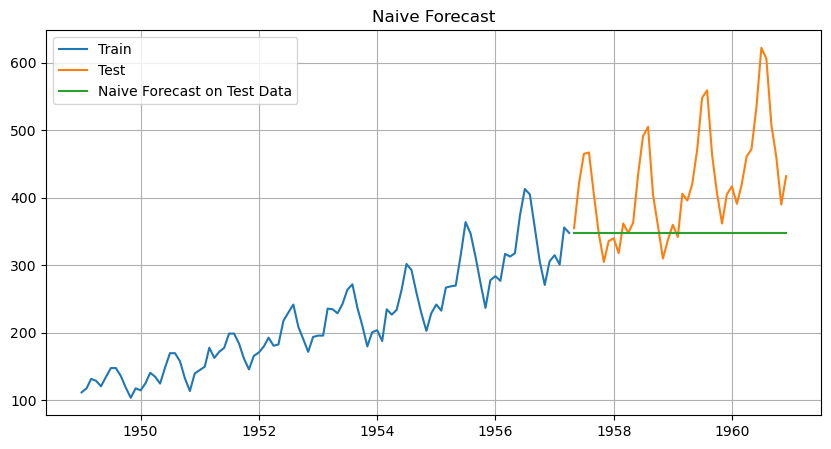

In [27]:
plt.plot(NaiveModel_train['Pax'], label='Train')
plt.plot(test['Pax'], label='Test')

plt.plot(NaiveModel_test['naive'], label='Naive Forecast on Test Data')

plt.legend(loc='best')
plt.title("Naive Forecast")
plt.grid();

In [28]:
rmse_model2_test = metrics.mean_squared_error(test['Pax'],NaiveModel_test['naive'],squared=False)
print("For RegressionOnTime forecast on the Test Data,  RMSE is %3.3f" %(rmse_model2_test))

For RegressionOnTime forecast on the Test Data,  RMSE is 105.750


In [29]:
resultsDf_2 = pd.DataFrame({'Test RMSE': [rmse_model2_test]},index=['NaiveModel'])

resultsDf = pd.concat([resultsDf, resultsDf_2])
resultsDf

,Test RMSE
RegressionOnTime,83.497125
NaiveModel,105.749812


## Method 3: Simple Average

In [30]:
SimpleAverage_train = train.copy()
SimpleAverage_test = test.copy()

In [31]:
SimpleAverage_test['mean_forecast'] = train['Pax'].mean()
SimpleAverage_test.head()

,Pax,mean_forecast
Year-Month,,
1957-05-01,355,218.36
1957-06-01,422,218.36
1957-07-01,465,218.36
1957-08-01,467,218.36
1957-09-01,404,218.36


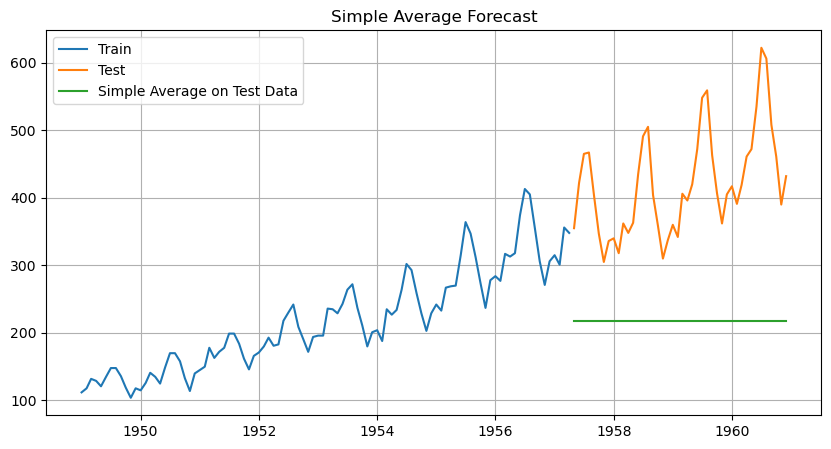

In [32]:
plt.plot(SimpleAverage_train['Pax'], label='Train')
plt.plot(SimpleAverage_test['Pax'], label='Test')

plt.plot(SimpleAverage_test['mean_forecast'], label='Simple Average on Test Data')

plt.legend(loc='best')
plt.title("Simple Average Forecast")
plt.grid();

In [33]:
rmse_model3_test = metrics.mean_squared_error(test['Pax'],SimpleAverage_test['mean_forecast'],squared=False)
print("For Simple Average forecast on the Test Data,  RMSE is %3.3f" %(rmse_model3_test))

For Simple Average forecast on the Test Data,  RMSE is 216.644


In [34]:
resultsDf_3 = pd.DataFrame({'Test RMSE': [rmse_model3_test]}
                           ,index=['SimpleAverageModel'])

resultsDf = pd.concat([resultsDf, resultsDf_3])
resultsDf

,Test RMSE
RegressionOnTime,83.497125
NaiveModel,105.749812
SimpleAverageModel,216.644110


# Method 4: Moving Average(MA)

In [35]:
MovingAverage = df1.copy()
MovingAverage.head()

,Pax
Year-Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [36]:

MovingAverage['Trailing_2'] = MovingAverage['Pax'].rolling(2).mean()
MovingAverage['Trailing_4'] = MovingAverage['Pax'].rolling(4).mean()
MovingAverage['Trailing_6'] = MovingAverage['Pax'].rolling(6).mean()


MovingAverage.head()

,Pax,Trailing_2,Trailing_4,Trailing_6
Year-Month,,,,
1949-01-01,112,NaN,NaN,NaN
1949-02-01,118,115.0,NaN,NaN
1949-03-01,132,125.0,NaN,NaN
1949-04-01,129,130.5,122.75,NaN
1949-05-01,121,125.0,125.00,NaN


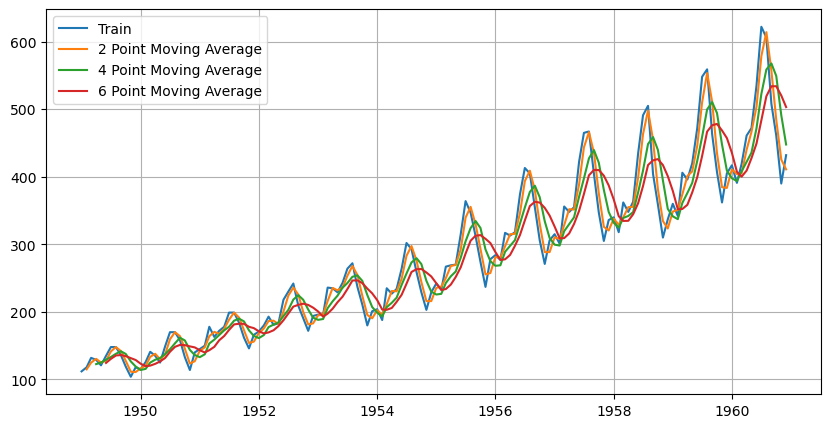

In [37]:
## Plotting on the whole data

plt.plot(MovingAverage['Pax'], label='Train')
plt.plot(MovingAverage['Trailing_2'], label='2 Point Moving Average')
plt.plot(MovingAverage['Trailing_4'], label='4 Point Moving Average')
plt.plot(MovingAverage['Trailing_6'],label = '6 Point Moving Average')

plt.legend(loc = 'best')
plt.grid();

In [38]:
#Creating train and test set 
trailing_MovingAverage_train=MovingAverage[0:int(len(MovingAverage)*0.7)] 
trailing_MovingAverage_test=MovingAverage[int(len(MovingAverage)*0.7):]

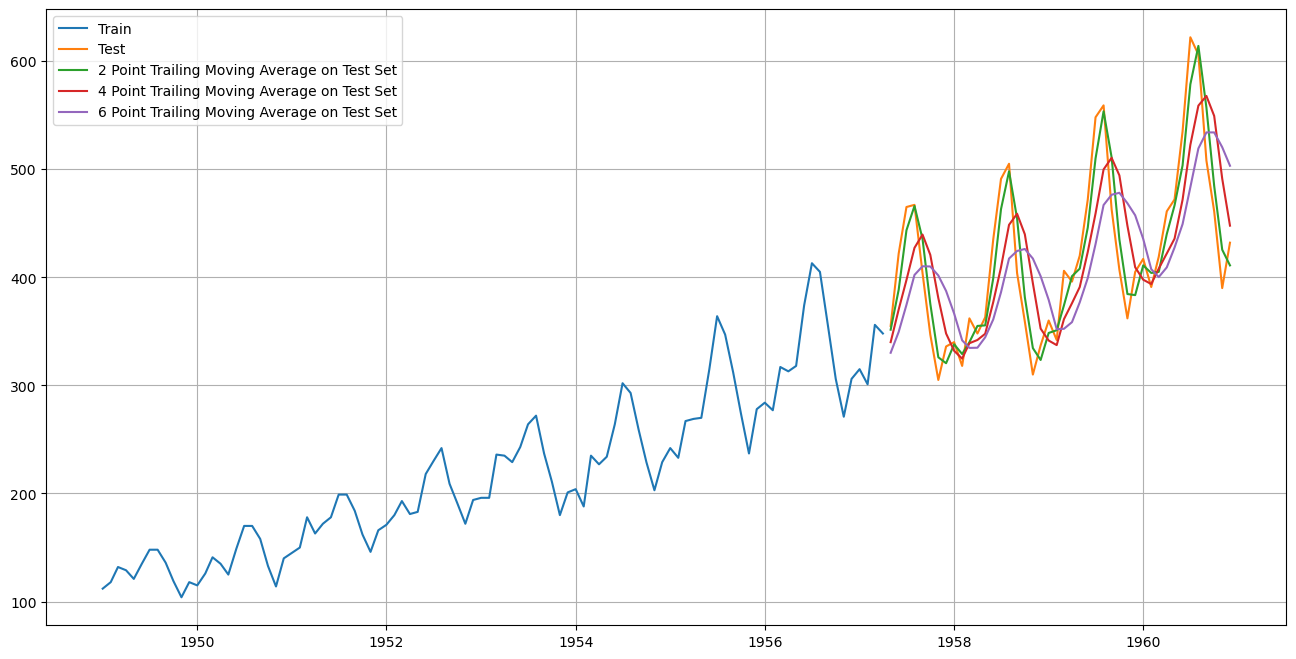

In [39]:
## Plotting on both the Training and Test data

plt.figure(figsize=(16,8))
plt.plot(trailing_MovingAverage_train["Pax"], label='Train')
plt.plot(trailing_MovingAverage_test['Pax'], label='Test')


plt.plot(trailing_MovingAverage_test['Trailing_2'], label='2 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_4'], label='4 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_6'],label = '6 Point Trailing Moving Average on Test Set')


plt.legend(loc = 'best')
plt.grid();

In [40]:
## Test Data - RMSE  --> 2 point Trailing MA

rmse_model4_test_2 = metrics.mean_squared_error(test['Pax'],trailing_MovingAverage_test['Trailing_2'],squared=False)
print("For 2 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_test_2))

## Test Data - RMSE --> 4 point Trailing MA

rmse_model4_test_4 = metrics.mean_squared_error(test['Pax'],trailing_MovingAverage_test['Trailing_4'],squared=False)
print("For 4 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_test_4))

## Test Data - RMSE --> 6 point Trailing MA

rmse_model4_test_6 = metrics.mean_squared_error(test['Pax'],trailing_MovingAverage_test['Trailing_6'],squared=False)
print("For 6 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_test_6))

For 2 point Moving Average Model forecast on the Training Data,  RMSE is 24.705
For 4 point Moving Average Model forecast on the Training Data,  RMSE is 54.067
For 6 point Moving Average Model forecast on the Training Data,  RMSE is 67.887


In [41]:
resultsDf_4 = pd.DataFrame({'Test RMSE': [rmse_model4_test_2,rmse_model4_test_4
                                          ,rmse_model4_test_6]}
                           ,index=['2pointTrailingMovingAverage','4pointTrailingMovingAverage'
                                   ,'6pointTrailingMovingAverage'])

resultsDf = pd.concat([resultsDf, resultsDf_4])
resultsDf

,Test RMSE
RegressionOnTime,83.497125
NaiveModel,105.749812
SimpleAverageModel,216.644110
2pointTrailingMovingAverage,24.704619
4pointTrailingMovingAverage,54.067140
6pointTrailingMovingAverage,67.887310


# Simple Exponential Smoothing 

In [42]:
from   statsmodels.tsa.api             import ExponentialSmoothing, SimpleExpSmoothing, Holt

In [43]:
# create class
model_SES = SimpleExpSmoothing(train,initialization_method='estimated')

C:\Users\aadij\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [44]:
# Fitting the Simple Exponential Smoothing model and asking python to choose the optimal parameters
model_SES_autofit = model_SES.fit(optimized=True)

In [45]:
model_SES_autofit = model_SES.fit(optimized=True)

In [46]:
SES_predict = model_SES_autofit.forecast(steps=len(test))
SES_predict

1957-05-01    348.0
1957-06-01    348.0
1957-07-01    348.0
1957-08-01    348.0
1957-09-01    348.0
1957-10-01    348.0
1957-11-01    348.0
1957-12-01    348.0
1958-01-01    348.0
1958-02-01    348.0
1958-03-01    348.0
1958-04-01    348.0
1958-05-01    348.0
1958-06-01    348.0
1958-07-01    348.0
1958-08-01    348.0
1958-09-01    348.0
1958-10-01    348.0
1958-11-01    348.0
1958-12-01    348.0
1959-01-01    348.0
1959-02-01    348.0
1959-03-01    348.0
1959-04-01    348.0
1959-05-01    348.0
1959-06-01    348.0
1959-07-01    348.0
1959-08-01    348.0
1959-09-01    348.0
1959-10-01    348.0
1959-11-01    348.0
1959-12-01    348.0
1960-01-01    348.0
1960-02-01    348.0
1960-03-01    348.0
1960-04-01    348.0
1960-05-01    348.0
1960-06-01    348.0
1960-07-01    348.0
1960-08-01    348.0
1960-09-01    348.0
1960-10-01    348.0
1960-11-01    348.0
1960-12-01    348.0
Freq: MS, dtype: float64

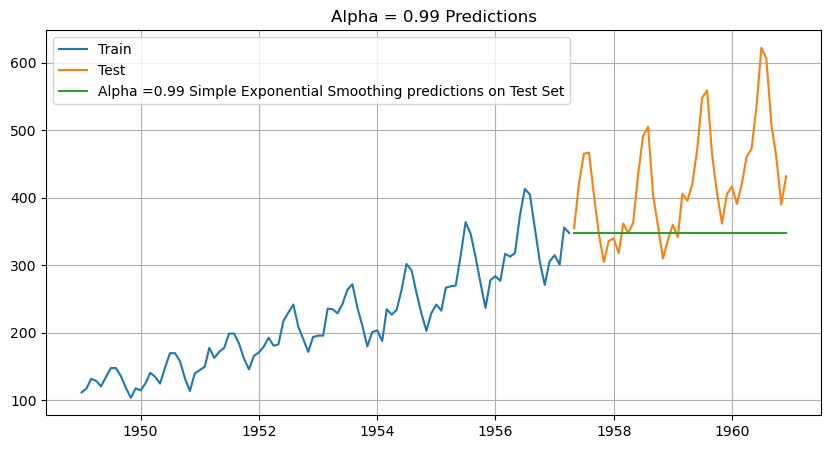

In [47]:
# Plotting the Training data, Test data and the forecasted values

plt.plot(train, label='Train')
plt.plot(test, label='Test')

plt.plot(SES_predict, label='Alpha =0.99 Simple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Alpha = 0.99 Predictions');

In [48]:
Rmse_test_sep=metrics.mean_squared_error(test.values,SES_predict.values,squared=False)

In [49]:
print('SES RMSE:',metrics.mean_squared_error(test.values,SES_predict.values,squared=False))

SES RMSE: 105.74981186674478


In [50]:
resultsDf_temp = pd.DataFrame({'Test RMSE': [Rmse_test_sep]}
                           ,index=['SEP'])

resultsDf = pd.concat([resultsDf, resultsDf_temp])
resultsDf

,Test RMSE
RegressionOnTime,83.497125
NaiveModel,105.749812
SimpleAverageModel,216.644110
2pointTrailingMovingAverage,24.704619
4pointTrailingMovingAverage,54.067140
6pointTrailingMovingAverage,67.887310
SEP,105.749812


# Holt's linear method with additive errors

In [51]:
# Initializing the Double Exponential Smoothing Model
model_DES = Holt(train,initialization_method='estimated')
# Fitting the model
model_DES = model_DES.fit()

print('')
print('==Holt model Exponential Smoothing Estimated Parameters ==')
print('')
print(model_DES.params)


==Holt model Exponential Smoothing Estimated Parameters ==

{'smoothing_level': 0.995, 'smoothing_trend': 0.0001, 'smoothing_seasonal': nan, 'damping_trend': nan, 'initial_level': 118.4666666666666, 'initial_trend': 2.0606060606060685, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


C:\Users\aadij\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [52]:
# Forecasting using this model for the duration of the test set
DES_predict =  model_DES.forecast(len(test))
DES_predict

1957-05-01    350.111961
1957-06-01    352.174923
1957-07-01    354.237886
1957-08-01    356.300849
1957-09-01    358.363811
1957-10-01    360.426774
1957-11-01    362.489736
1957-12-01    364.552699
1958-01-01    366.615662
1958-02-01    368.678624
1958-03-01    370.741587
1958-04-01    372.804549
1958-05-01    374.867512
1958-06-01    376.930474
1958-07-01    378.993437
1958-08-01    381.056400
1958-09-01    383.119362
1958-10-01    385.182325
1958-11-01    387.245287
1958-12-01    389.308250
1959-01-01    391.371213
1959-02-01    393.434175
1959-03-01    395.497138
1959-04-01    397.560100
1959-05-01    399.623063
1959-06-01    401.686026
1959-07-01    403.748988
1959-08-01    405.811951
1959-09-01    407.874913
1959-10-01    409.937876
1959-11-01    412.000839
1959-12-01    414.063801
1960-01-01    416.126764
1960-02-01    418.189726
1960-03-01    420.252689
1960-04-01    422.315652
1960-05-01    424.378614
1960-06-01    426.441577
1960-07-01    428.504539
1960-08-01    430.567502


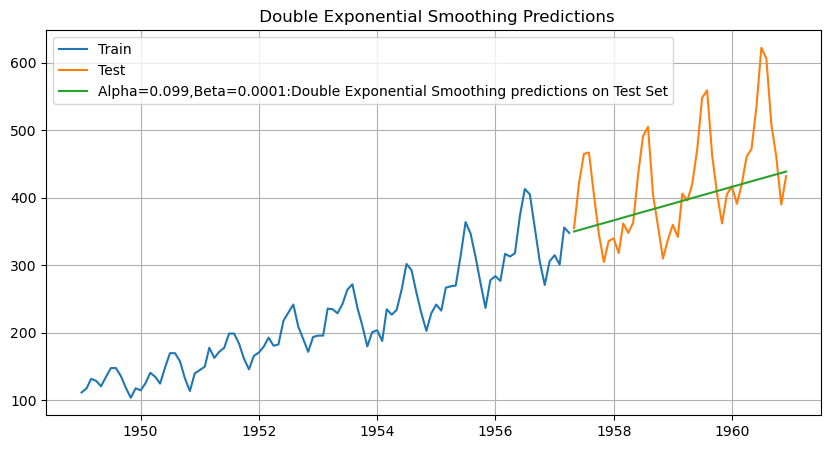

In [53]:
## Plotting the Training data, Test data and the forecasted values

plt.plot(train, label='Train')
plt.plot(test, label='Test')

plt.plot(DES_predict, label='Alpha=0.099,Beta=0.0001:Double Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title(' Double Exponential Smoothing Predictions');

In [54]:
print('DES RMSE:',metrics.mean_squared_error(test.values,DES_predict.values,squared=False))

DES RMSE: 72.79140563178333


In [55]:
Des_Rmse=metrics.mean_squared_error(test.values,DES_predict.values,squared=False)

In [56]:
resultsDf_temp = pd.DataFrame({'Test RMSE': [metrics.mean_squared_error(test.values,DES_predict.values,squared=False)]}
                           ,index=['Alpha=1,Beta=0.0189:DES'])

resultsDf = pd.concat([resultsDf, resultsDf_temp])
resultsDf

,Test RMSE
RegressionOnTime,83.497125
NaiveModel,105.749812
SimpleAverageModel,216.644110
2pointTrailingMovingAverage,24.704619
4pointTrailingMovingAverage,54.067140
6pointTrailingMovingAverage,67.887310
SEP,105.749812
"Alpha=1,Beta=0.0189:DES",72.791406


# Holt Winter's linear method with additive errors

In [57]:
# Initializing the Double Exponential Smoothing Model
model_TES = ExponentialSmoothing(train,trend='additive',seasonal='additive',initialization_method='estimated')
# Fitting the model
model_TES = model_TES.fit()

print('')
print('==Holt Winters model Exponential Smoothing Estimated Parameters ==')
print('')
print(model_TES.params)


==Holt Winters model Exponential Smoothing Estimated Parameters ==

{'smoothing_level': 0.2550245412297813, 'smoothing_trend': 0.0, 'smoothing_seasonal': 0.7449754587702186, 'damping_trend': nan, 'initial_level': 118.79315801777712, 'initial_trend': 2.3251423119234813, 'initial_seasons': array([ -9.11828654,  -3.51483146,   8.96340524,   3.69103855,
        -5.06838464,   9.03456773,  21.24898526,  18.82211058,
         4.6881363 , -14.11678354, -28.55770929, -11.94911318]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


C:\Users\aadij\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [58]:
# Forecasting using this model for the duration of the test set
TES_predict =  model_TES.forecast(len(test))
TES_predict

1957-05-01    351.239626
1957-06-01    403.308247
1957-07-01    439.936947
1957-08-01    426.799961
1957-09-01    375.973072
1957-10-01    329.109504
1957-11-01    295.900972
1957-12-01    333.331431
1958-01-01    343.405412
1958-02-01    331.809349
1958-03-01    384.455334
1958-04-01    374.284458
1958-05-01    379.141334
1958-06-01    431.209955
1958-07-01    467.838654
1958-08-01    454.701668
1958-09-01    403.874780
1958-10-01    357.011212
1958-11-01    323.802680
1958-12-01    361.233139
1959-01-01    371.307119
1959-02-01    359.711056
1959-03-01    412.357042
1959-04-01    402.186166
1959-05-01    407.043042
1959-06-01    459.111662
1959-07-01    495.740362
1959-08-01    482.603376
1959-09-01    431.776488
1959-10-01    384.912919
1959-11-01    351.704388
1959-12-01    389.134847
1960-01-01    399.208827
1960-02-01    387.612764
1960-03-01    440.258750
1960-04-01    430.087874
1960-05-01    434.944750
1960-06-01    487.013370
1960-07-01    523.642070
1960-08-01    510.505084


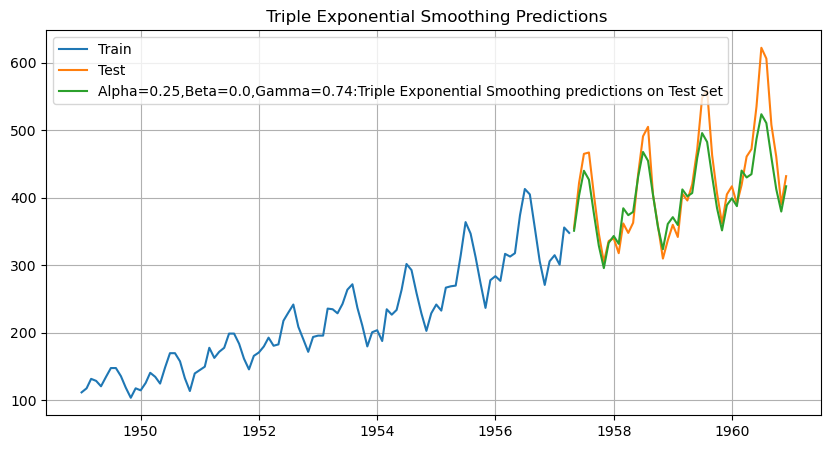

In [59]:
## Plotting the Training data, Test data and the forecasted values

plt.plot(train, label='Train')
plt.plot(test, label='Test')

plt.plot(TES_predict, label='Alpha=0.25,Beta=0.0,Gamma=0.74:Triple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title(' Triple Exponential Smoothing Predictions');

In [60]:
print('TES RMSE:',metrics.mean_squared_error(test.values,TES_predict.values,squared=False))

TES RMSE: 33.628798291297194


In [61]:
resultsDf_temp = pd.DataFrame({'Test RMSE': [metrics.mean_squared_error(test.values,TES_predict.values,squared=False)]}
                           ,index=['Alpha=0.25,Beta=0.0,Gamma=0.74:TES'])

resultsDf = pd.concat([resultsDf, resultsDf_temp])
resultsDf

,Test RMSE
RegressionOnTime,83.497125
NaiveModel,105.749812
SimpleAverageModel,216.644110
2pointTrailingMovingAverage,24.704619
4pointTrailingMovingAverage,54.067140
6pointTrailingMovingAverage,67.887310
SEP,105.749812
"Alpha=1,Beta=0.0189:DES",72.791406
"Alpha=0.25,Beta=0.0,Gamma=0.74:TES",33.628798


# ARIMA

In [62]:
## Let's start by building ARIMA model -- Although the data set has some seasonality and hence ARIMA is 
## not the right option Reason for making the model is to understand how different the model could be if seasonality is not considered

from statsmodels.tsa.arima.model import ARIMA
param=[2,2,0]
mod = ARIMA(train, order=param)
results_Arima = mod.fit()

C:\Users\aadij\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\aadij\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\aadij\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [63]:
results_Arima.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                    Pax   No. Observations:                  100
Model:                 ARIMA(2, 2, 0)   Log Likelihood                -461.731
Date:                Thu, 02 Mar 2023   AIC                            929.463
Time:                        13:51:56   BIC                            937.218
Sample:                    01-01-1949   HQIC                           932.600
                         - 04-01-1957                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3530      0.099     -3.553      0.000      -0.548      -0.158
ar.L2         -0.3441      0.119     -2.902      0.004      -0.577      -0.112
sigma2       721.9058     94.648      7.627      0.000     536.398     907.413
===================================================================================
Ljung-Box (L1) (Q):                   0.05   Jarque-Bera (JB):                 3.20
Prob(Q):                              0.82   Prob(JB):                         0.20
Heteroskedasticity (H):               4.29   Skew:                             0.39
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.42
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [64]:

pred_ARIMA = results_Arima.forecast(steps=len(test))
pred_ARIMA

1957-05-01    338.492523
1957-06-01    351.197030
1957-07-01    356.580115
1957-08-01    356.903745
1957-09-01    361.532700
1957-10-01    366.383087
1957-11-01    369.673745
1957-12-01    373.438741
1958-01-01    377.573052
1958-02-01    381.413773
1958-03-01    385.231033
1958-04-01    389.157605
1958-05-01    393.053667
1958-06-01    396.922881
1958-07-01    400.812071
1958-08-01    404.703449
1958-09-01    408.587181
1958-10-01    412.472859
1958-11-01    416.360481
1958-12-01    420.246747
1959-01-01    424.132822
1959-02-01    428.019431
1959-03-01    431.905918
1959-04-01    435.792264
1959-05-01    439.678702
1959-06-01    443.565156
1959-07-01    447.451573
1959-08-01    451.337997
1959-09-01    455.224431
1959-10-01    459.110860
1959-11-01    462.997287
1959-12-01    466.883716
1960-01-01    470.770145
1960-02-01    474.656574
1960-03-01    478.543002
1960-04-01    482.429431
1960-05-01    486.315860
1960-06-01    490.202288
1960-07-01    494.088717
1960-08-01    497.975146


In [65]:
test

,Pax
Year-Month,
1957-05-01,355
1957-06-01,422
1957-07-01,465
1957-08-01,467
1957-09-01,404
1957-10-01,347
1957-11-01,305
1957-12-01,336
1958-01-01,340


In [66]:
rmse_arima=metrics.mean_squared_error(test.Pax,pred_ARIMA,squared=False)

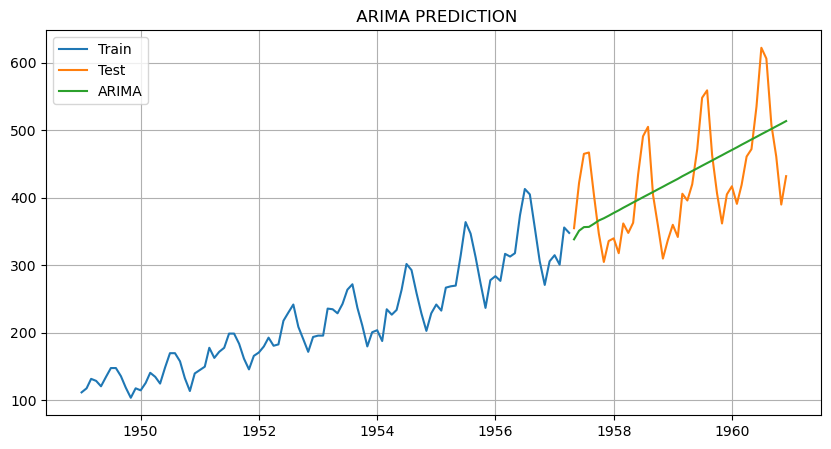

In [67]:
# Plotting the Training data, Test data and the forecasted values

plt.plot(train, label='Train')
plt.plot(test, label='Test')

plt.plot(pred_ARIMA, label='ARIMA')

plt.legend(loc='best')
plt.grid()
plt.title(' ARIMA PREDICTION');

In [68]:
resultsDf_temp = pd.DataFrame({'Test RMSE':rmse_arima}
                           ,index=["ARIMA"])

resultsDf = pd.concat([resultsDf, resultsDf_temp])
resultsDf

,Test RMSE
RegressionOnTime,83.497125
NaiveModel,105.749812
SimpleAverageModel,216.644110
2pointTrailingMovingAverage,24.704619
4pointTrailingMovingAverage,54.067140
6pointTrailingMovingAverage,67.887310
SEP,105.749812
"Alpha=1,Beta=0.0189:DES",72.791406
"Alpha=0.25,Beta=0.0,Gamma=0.74:TES",33.628798
ARIMA,68.567445


# Sarima 

In [89]:
mod = sm.tsa.statespace.SARIMAX(train,
                                order=(2,2,1),
                                seasonal_order=(1,2,1,12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary())

C:\Users\aadij\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\aadij\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                                     SARIMAX Results                                      
Dep. Variable:                                Pax   No. Observations:                  100
Model:             SARIMAX(2, 2, 1)x(1, 2, 1, 12)   Log Likelihood                -229.903
Date:                            Thu, 02 Mar 2023   AIC                            471.807
Time:                                    14:27:58   BIC                            484.373
Sample:                                01-01-1949   HQIC                           476.722
                                     - 04-01-1957                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3765      0.156     -2.418      0.016      -0.682      -0.071
ar.L2         -0.0183      0.175   

In [90]:
pred_SARIMA = results.get_forecast(steps=len(test))
pred_SARIMA.predicted_mean

1957-05-01    357.378959
1957-06-01    415.834422
1957-07-01    464.935937
1957-08-01    451.015226
1957-09-01    399.590096
1957-10-01    349.942444
1957-11-01    310.277656
1957-12-01    351.410726
1958-01-01    360.722411
1958-02-01    345.619210
1958-03-01    402.106638
1958-04-01    395.758787
1958-05-01    407.236335
1958-06-01    472.434194
1958-07-01    523.320425
1958-08-01    509.715088
1958-09-01    451.410056
1958-10-01    397.002058
1958-11-01    355.473648
1958-12-01    397.895852
1959-01-01    408.704632
1959-02-01    390.190951
1959-03-01    453.755484
1959-04-01    446.851972
1959-05-01    461.447782
1959-06-01    531.735684
1959-07-01    587.882338
1959-08-01    572.146973
1959-09-01    509.273276
1959-10-01    451.870122
1959-11-01    407.430247
1959-12-01    453.204294
1960-01-01    465.119726
1960-02-01    444.226188
1960-03-01    512.685427
1960-04-01    506.216407
1960-05-01    523.607469
1960-06-01    599.749568
1960-07-01    659.834354
1960-08-01    643.055781


In [91]:
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(test,pred_SARIMA.predicted_mean))
print(rmse)

45.337351312163946


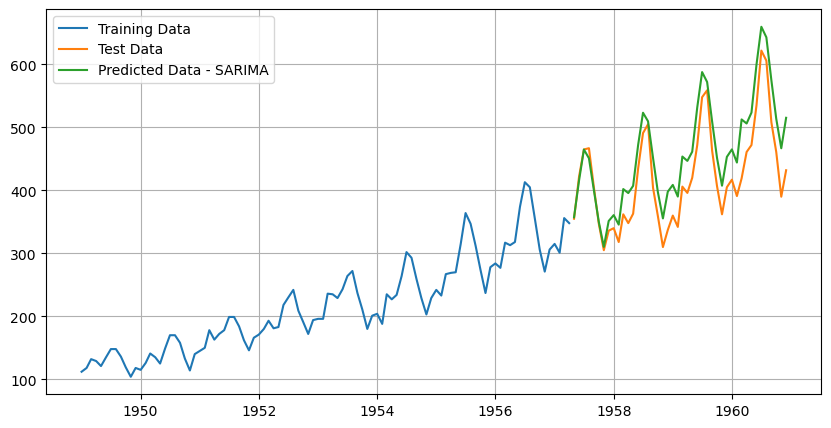

In [92]:
plt.plot(train,label='Training Data')
plt.plot(test,label='Test Data')
plt.plot(test.index,pred_SARIMA.predicted_mean,label='Predicted Data - SARIMA')

plt.legend(loc='best')
plt.grid();

In [93]:
resultsDf_temp = pd.DataFrame({'Test RMSE':rmse}
                           ,index=["SARIMA"])

resultsDf = pd.concat([resultsDf, resultsDf_temp])
resultsDf

,Test RMSE
RegressionOnTime,83.497125
NaiveModel,105.749812
SimpleAverageModel,216.644110
2pointTrailingMovingAverage,24.704619
4pointTrailingMovingAverage,54.067140
6pointTrailingMovingAverage,67.887310
SEP,105.749812
"Alpha=1,Beta=0.0189:DES",72.791406
"Alpha=0.25,Beta=0.0,Gamma=0.74:TES",33.628798
ARIMA,68.567445


In [94]:
cd

C:\Users\aadij
